In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
path = Path('/content/drive/MyDrive/Sophomore Year/Food Pantry Research')
# bootcamp_path.mkdir(parents=True, exist_ok=True)
# file_path.mkdir(parents=True, exist_ok=True)


In [ ]:
!pip install mastml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of globus-compute-sdk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of globus-compute-sdk to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of funcx to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of funcx to determine which version is compatible

In [ ]:
# perform SHAP analysis
!pip install shap

In [ ]:
import sys
sys.path.append(str(path))

In [ ]:
%%capture
!pip install pymatgen==2023.9.2

In [ ]:
#import statements
import os                        # OS stands for Operating System and provides ways for python to interact with files or directories
from collections import Counter  # Collections is a package for handling data
from pprint import pprint

import pandas as pd              # Pandas is a data analysis library which we'll primarily use to handle our dataset
import numpy as np               # Numpy is a package for scientific computing. We'll use it for some of it's math functions
from pymatgen import core        # Pymatgen is a library for materials analysis which we use to interpret our material compositions
import matplotlib                # Matplotlib is the plotting package that we'll use throughout the lab
import matplotlib.pyplot as plt
import seaborn as sns            # Seaborn is a Python data visualization library based on matplotlib
import sklearn                   # Scikit-learn is a machine learning package, providing the backbone for the work we'll perform
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate,GridSearchCV,ParameterGrid
from sklearn.model_selection import KFold,RepeatedKFold
from mastml.mastml import Mastml
#from mastml.datasets import SklearnDatasets
from mastml.preprocessing import SklearnPreprocessor
from mastml.models import SklearnModel
from mastml.data_splitters import SklearnDataSplitter

scikit-lego is an optional dependency, enabling use of the LowessRegression model. If you want to use this model, do "pip install scikit-lego"
linear-tree is an optional dependency, enabling use of Linear tree, forest, and boosting models. If you want to use this model, do "pip install linear-tree"
gplearn is an optional dependency, enabling the use of genetic programming SymbolicRegressor model. If you want to use this model, do "pip install gplearn"


ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


In [ ]:
food_pantry_df = pd.read_csv(os.path.join(path,"skunkworks_data.csv"))
food_pantry_df

# len(food_pantry_df.columns)

,Date,Amount,Type,Fund,Campaign,Appeal,Primary ZIP Code,Account Number
0,9/25/2024,$0.00,Donation,Unrestricted,In-Kind,Individual Multi Channel,NaN,338
1,9/25/2024,$300.00,Donation,Unrestricted,Support The River,Individual Online,53704-1021,2574
2,9/25/2024,$25.81,Recurring Donation Payment,Unrestricted,Support The River,Individual Online,53590-3843,2692
3,9/24/2024,$0.00,Donation,Unrestricted,In-Kind,Business Multi Channel,NaN,20749
4,9/24/2024,$100.00,Donation,Unrestricted,Support The River,Individual Multi Channel,53703-2599,310
...,...,...,...,...,...,...,...,...
11484,1/1/2023,$108.15,Donation,Unrestricted,Year-End 2022,Year-End Appeal Mailing 2022,53590-9246,244
11485,1/1/2023,$103.00,Donation,Unrestricted,Support The River,Individual Online,53718-3180,84
11486,1/1/2023,$103.00,Donation,Unrestricted,Support The River,Individual Online,53711-1156,4540
11487,1/1/2023,"$1,030.00",Donation,Unrestricted,Support The River,Individual Online,53718-8249,1069


In [ ]:
# transforming the column data types
food_pantry_df.dtypes

food_pantry_df["Amount"] = pd.to_numeric(food_pantry_df["Amount"].str.replace('[\$,.%]', '', regex=True))


In [ ]:
food_pantry_df["Date"] = pd.to_datetime(food_pantry_df["Date"])

In [ ]:
food_pantry_df["Day"] = food_pantry_df["Date"].dt.day
food_pantry_df["Month"] = food_pantry_df["Date"].dt.month
food_pantry_df["Year"] = food_pantry_df["Date"].dt.year

In [ ]:
del food_pantry_df["Primary ZIP Code"]
del food_pantry_df["Date"]
del food_pantry_df["Account Number"]

food_pantry_df

,Amount,Type,Fund,Campaign,Appeal,Day,Month,Year
0,0,Donation,Unrestricted,In-Kind,Individual Multi Channel,25,9,2024
1,30000,Donation,Unrestricted,Support The River,Individual Online,25,9,2024
2,2581,Recurring Donation Payment,Unrestricted,Support The River,Individual Online,25,9,2024
3,0,Donation,Unrestricted,In-Kind,Business Multi Channel,24,9,2024
4,10000,Donation,Unrestricted,Support The River,Individual Multi Channel,24,9,2024
...,...,...,...,...,...,...,...,...
11484,10815,Donation,Unrestricted,Year-End 2022,Year-End Appeal Mailing 2022,1,1,2023
11485,10300,Donation,Unrestricted,Support The River,Individual Online,1,1,2023
11486,10300,Donation,Unrestricted,Support The River,Individual Online,1,1,2023
11487,103000,Donation,Unrestricted,Support The River,Individual Online,1,1,2023


In [ ]:
# PERFORM SHAP ANALYSIS ON NUMERICAL DATA
food_pantry_df_v2 = pd.read_csv(os.path.join(path,"skunkworks_data_v2.csv"))
food_pantry_df_v2

,Date,Amount,Normalized Amount,Type,Fund,Campaign,Appeal,Primary ZIP Code,Account Number,Total Donation,Num Months,Average Monthly Donation
0,6/10/2024,3000000.00,1.371855e-01,Pledge,Cap Camp Unrestricted,2023-2024 Recipe for Hope,Gov Application,Unknown,20113,15722436.67,21,748687.4605
1,3/12/2024,1500000.00,6.859277e-02,Pledge Payment,Cap Camp Unrestricted,2023-2024 Recipe for Hope,Gov Application,53703-3340,1910,15722436.67,21,748687.4605
2,8/21/2023,1500000.00,6.859277e-02,Pledge,Cap Camp Unrestricted,2023-2024 Recipe for Hope,Gov Application,53703-3340,1910,15722436.67,21,748687.4605
3,7/27/2023,1012500.00,4.630012e-02,Donation,Unrestricted,In-Kind,Business Multi Channel,10003-2001,10511,1331842.88,20,66592.1440
4,5/2/2024,660000.00,3.018082e-02,Pledge,Unrestricted,Support The River,Foundation Application,98103,13936,4151322.47,21,197682.0224
...,...,...,...,...,...,...,...,...,...,...,...,...
10946,11/1/2023,0.75,3.430000e-08,Donation,Unrestricted,Support The River,Foundation Multi Channel,Unknown,1930,4151322.47,21,197682.0224
10947,6/3/2024,0.70,3.200000e-08,Donation,Unrestricted,Support The River,Foundation Multi Channel,Unknown,1930,4151322.47,21,197682.0224
10948,1/6/2023,0.37,1.690000e-08,Donation,Unrestricted,Support The River,Foundation Multi Channel,Unknown,1930,4151322.47,21,197682.0224
10949,8/1/2024,0.20,9.150000e-09,Donation,Unrestricted,Support The River,Foundation Multi Channel,Unknown,1930,4151322.47,21,197682.0224


In [ ]:



#remove non-numerical data and amount column

food_pantry_df_v2["Date"] = pd.to_datetime(food_pantry_df_v2["Date"])
food_pantry_df_v2["Day"] = food_pantry_df_v2["Date"].dt.day
food_pantry_df_v2["Month"] = food_pantry_df_v2["Date"].dt.month
food_pantry_df_v2["Year"] = food_pantry_df_v2["Date"].dt.year


food_pantry_df_v2_numerical = food_pantry_df_v2[["Day", "Month", "Year", "Normalized Amount", "Num Months"]]

food_pantry_df_v2_numerical

,Day,Month,Year,Normalized Amount,Num Months
0,10,6,2024,1.371855e-01,21
1,12,3,2024,6.859277e-02,21
2,21,8,2023,6.859277e-02,21
3,27,7,2023,4.630012e-02,20
4,2,5,2024,3.018082e-02,21
...,...,...,...,...,...
10946,1,11,2023,3.430000e-08,21
10947,3,6,2024,3.200000e-08,21
10948,6,1,2023,1.690000e-08,21
10949,1,8,2024,9.150000e-09,21


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X = food_pantry_df_v2_numerical.drop(columns=["Normalized Amount"])
y = food_pantry_df_v2_numerical["Normalized Amount"]

In [ ]:
X

,Day,Month,Year,Num Months
0,10,6,2024,21
1,12,3,2024,21
2,21,8,2023,21
3,27,7,2023,20
4,2,5,2024,21
...,...,...,...,...
10946,1,11,2023,21
10947,3,6,2024,21
10948,6,1,2023,21
10949,1,8,2024,21


In [ ]:
y

,Normalized Amount
0,1.371855e-01
1,6.859277e-02
2,6.859277e-02
3,4.630012e-02
4,3.018082e-02
...,...
10946,3.430000e-08
10947,3.200000e-08
10948,1.690000e-08
10949,9.150000e-09


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# utilized https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137
import shap
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)


ExactExplainer explainer: 3287it [01:57, 25.31it/s]                          


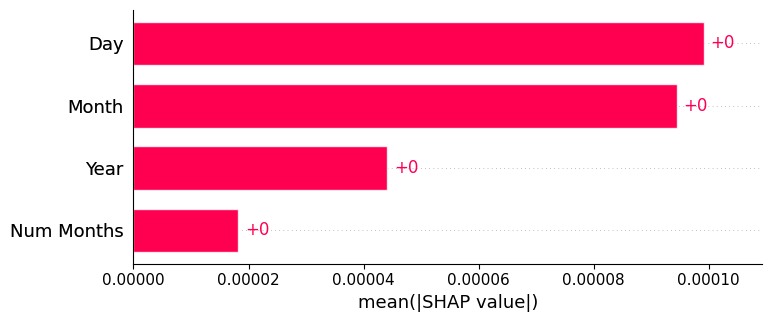

In [ ]:
shap.plots.bar(shap_values)


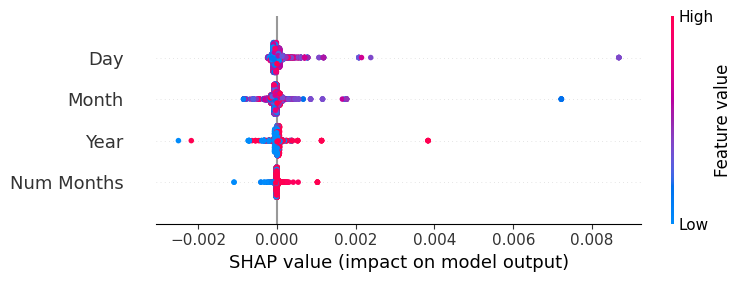

In [ ]:
shap.summary_plot(shap_values)

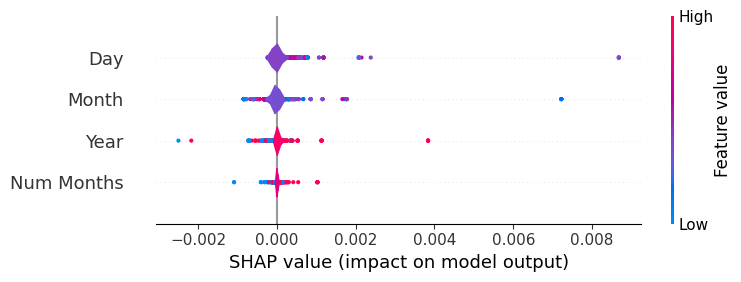

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
food_pantry_df_v3 = food_pantry_df_v2

food_pantry_df_v3["Date"] = pd.to_datetime(food_pantry_df_v3["Date"])


food_pantry_df_v3["Day"] = food_pantry_df_v3["Date"].dt.day
food_pantry_df_v3["Month"] = food_pantry_df_v3["Date"].dt.month
food_pantry_df_v3["Year"] = food_pantry_df_v3["Date"].dt.year

food_pantry_df_v3

,Date,Amount,Normalized Amount,Type,Fund,Campaign,Appeal,Primary ZIP Code,Account Number,Total Donation,Num Months,Average Monthly Donation,Day,Month,Year
0,2024-06-10,3000000.00,1.371855e-01,Pledge,Cap Camp Unrestricted,2023-2024 Recipe for Hope,Gov Application,Unknown,20113,15722436.67,21,748687.4605,10,6,2024
1,2024-03-12,1500000.00,6.859277e-02,Pledge Payment,Cap Camp Unrestricted,2023-2024 Recipe for Hope,Gov Application,53703-3340,1910,15722436.67,21,748687.4605,12,3,2024
2,2023-08-21,1500000.00,6.859277e-02,Pledge,Cap Camp Unrestricted,2023-2024 Recipe for Hope,Gov Application,53703-3340,1910,15722436.67,21,748687.4605,21,8,2023
3,2023-07-27,1012500.00,4.630012e-02,Donation,Unrestricted,In-Kind,Business Multi Channel,10003-2001,10511,1331842.88,20,66592.1440,27,7,2023
4,2024-05-02,660000.00,3.018082e-02,Pledge,Unrestricted,Support The River,Foundation Application,98103,13936,4151322.47,21,197682.0224,2,5,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10946,2023-11-01,0.75,3.430000e-08,Donation,Unrestricted,Support The River,Foundation Multi Channel,Unknown,1930,4151322.47,21,197682.0224,1,11,2023
10947,2024-06-03,0.70,3.200000e-08,Donation,Unrestricted,Support The River,Foundation Multi Channel,Unknown,1930,4151322.47,21,197682.0224,3,6,2024
10948,2023-01-06,0.37,1.690000e-08,Donation,Unrestricted,Support The River,Foundation Multi Channel,Unknown,1930,4151322.47,21,197682.0224,6,1,2023
10949,2024-08-01,0.20,9.150000e-09,Donation,Unrestricted,Support The River,Foundation Multi Channel,Unknown,1930,4151322.47,21,197682.0224,1,8,2024


In [ ]:
food_pantry_df_v3_numerical = food_pantry_df_v3[["Amount", "Day", "Month", "Year", "Num Months"]]

In [ ]:
X = food_pantry_df_v3_numerical.drop(columns=["Amount"])
y = food_pantry_df_v3_numerical["Amount"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
import shap
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

ExactExplainer explainer: 3287it [02:14, 23.78it/s]


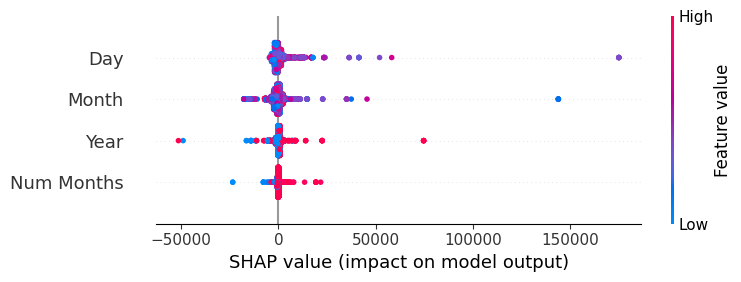

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
# need to use one hot encoding for the other columns - code from GeeksforGeeks
from sklearn.preprocessing import OneHotEncoder


categorical_columns = food_pantry_df.select_dtypes(include=['object']).columns.tolist()


encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(food_pantry_df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

In [ ]:
one_hot_df

,Type_Donation,Type_Pledge,Type_Pledge Payment,Type_Recurring Donation Payment,Type_Recurring Donation Schedule,Type_Soft Credit,Fund_Cap Camp Building,Fund_Cap Camp Operational Res,Fund_Cap Camp Unrestricted,Fund_Curbside,...,Appeal_Individual Online,Appeal_Individual Payroll,Appeal_Individual Phone,Appeal_Service Org Application,Appeal_Service Org Event,Appeal_Service Org Mailing,Appeal_Service Org Multi Channel,Appeal_Service Org Online,Appeal_Year-End Appeal Mailing 2022,Appeal_nan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11484,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11486,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11487,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded = pd.concat([food_pantry_df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)

df_encoded

,Amount,Day,Month,Year,Type_Donation,Type_Pledge,Type_Pledge Payment,Type_Recurring Donation Payment,Type_Recurring Donation Schedule,Type_Soft Credit,...,Appeal_Individual Online,Appeal_Individual Payroll,Appeal_Individual Phone,Appeal_Service Org Application,Appeal_Service Org Event,Appeal_Service Org Mailing,Appeal_Service Org Multi Channel,Appeal_Service Org Online,Appeal_Year-End Appeal Mailing 2022,Appeal_nan
0,0,25,9,2024,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30000,25,9,2024,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2581,25,9,2024,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,24,9,2024,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000,24,9,2024,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11484,10815,1,1,2023,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11485,10300,1,1,2023,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11486,10300,1,1,2023,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11487,103000,1,1,2023,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded.dtypes

,0
Amount,int64
Day,int32
Month,int32
Year,int32
Type_Donation,float64
...,...
Appeal_Service Org Mailing,float64
Appeal_Service Org Multi Channel,float64
Appeal_Service Org Online,float64
Appeal_Year-End Appeal Mailing 2022,float64


In [ ]:
# Predicting the Amount
X = df_encoded.drop(columns=["Amount"])
y = df_encoded["Amount"]

X


,Day,Month,Year,Type_Donation,Type_Pledge,Type_Pledge Payment,Type_Recurring Donation Payment,Type_Recurring Donation Schedule,Type_Soft Credit,Fund_Cap Camp Building,...,Appeal_Individual Online,Appeal_Individual Payroll,Appeal_Individual Phone,Appeal_Service Org Application,Appeal_Service Org Event,Appeal_Service Org Mailing,Appeal_Service Org Multi Channel,Appeal_Service Org Online,Appeal_Year-End Appeal Mailing 2022,Appeal_nan
0,25,9,2024,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25,9,2024,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,9,2024,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24,9,2024,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24,9,2024,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11484,1,1,2023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11485,1,1,2023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11486,1,1,2023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11487,1,1,2023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

,Amount
0,0
1,30000
2,2581
3,0
4,10000
...,...
11484,10815
11485,10300
11486,10300
11487,103000


In [ ]:
seed = 2345312
# Generate train/test split by reserving 10% of data as test set

test_fraction = 0.10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, shuffle=True,random_state=seed)

In [ ]:
# can check if the splits are ok

In [ ]:
# Random Forest
Default_model = RandomForestRegressor(random_state=seed,n_estimators=1,bootstrap=False).fit(X_train,y_train) # fit the decision tree model
print('Model training complete.')

Model training complete.


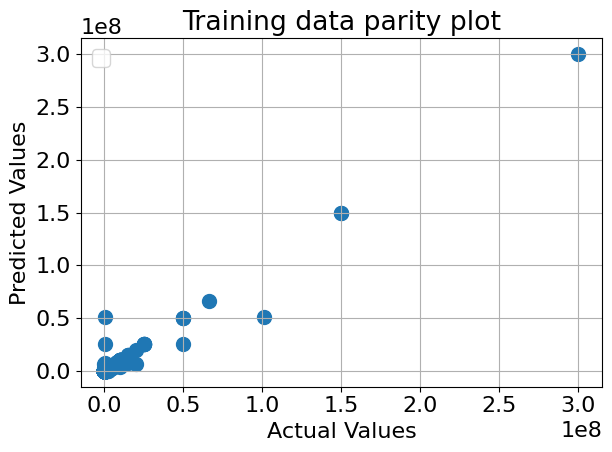

In [ ]:
Train_predictions = Default_model.predict(X_train)    # Make predictions on training data
Test_predictions = Default_model.predict(X_test)      # Make predictions on testing data

# Scatter plot
plt.scatter(y_train, Train_predictions)

# Add the line of equality
# plt.plot([min(y_train), max(Train_predictions)], [min(y_train), max(Train_predictions)], 'r--', label='Line of Equality')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training data parity plot')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

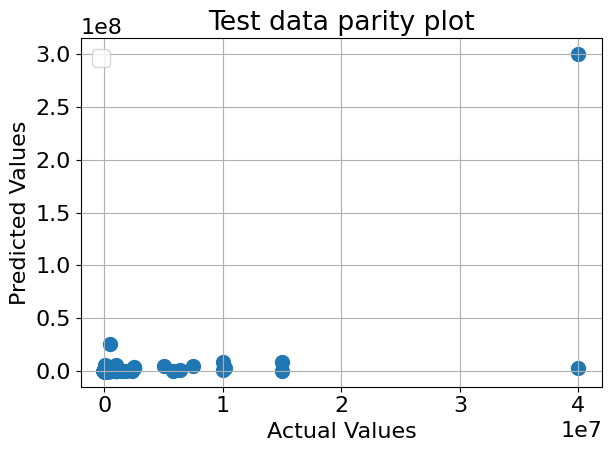

In [ ]:
# Scatter plot
plt.scatter(y_test, Test_predictions)

# Add the line of equality
# plt.plot([min(y_train), max(Train_predictions)], [min(y_train), max(Train_predictions)], 'r--', label='Line of Equality')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test data parity plot')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
kfold = KFold(n_splits=5,random_state=seed,shuffle=True)

In [ ]:
default_opt_dict = {'n_estimators':[1]}

default_CV = GridSearchCV(Default_model,
                          default_opt_dict,
                          cv=kfold,
                          return_train_score=True,
                          scoring=['neg_mean_squared_error','r2','neg_mean_absolute_error'],
                          refit='neg_mean_squared_error')
default_CV = default_CV.fit(X_train,y_train)

default_CV_stats = CV_best_stats(default_CV,y_train)

NameError: name 'CV_best_stats' is not defined

In [ ]:
preprocessor = SklearnPreprocessor(
                                    preprocessor='StandardScaler', as_frame=True
                                   )

In [ ]:
splitter = SklearnDataSplitter(splitter='RepeatedKFold', n_repeats=1, n_splits=5)

In [ ]:
SAVEPATH = 'drive/MyDrive/Food Pantry Research'

# the Mastml call here is initializing the Mastml object
mastml = Mastml(savepath=SAVEPATH)
# the get_savepath method generates the output folder specified above
savepath = mastml.get_savepath

drive/MyDrive/Food Pantry Research not empty. Renaming...


In [ ]:
random_forest_model = SklearnModel(model='RandomForestRegressor')


Running splits: 100%|██████████| 5/5 [16:58<00:00, 203.76s/it]


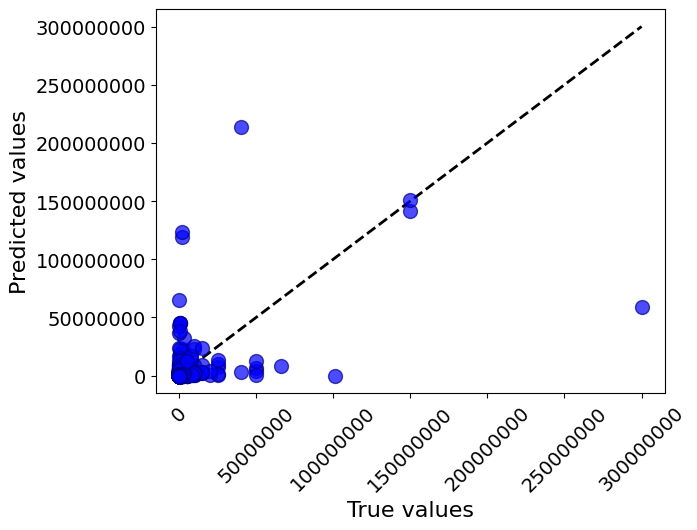

In [ ]:
splitter = SklearnDataSplitter(splitter='RepeatedKFold', n_repeats=1, n_splits=5)
splitter.evaluate(X=X,
                  y=y,
                  models=[random_forest_model],
                  preprocessor=preprocessor,
                  savepath=savepath,
                  verbosity=3)

In [ ]:
# xgboost
# xboost information and code from : https://gist.github.com/pb111/cc341409081dffa5e9eaf60d79562a03
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 1,
            'learning_rate': 0.01,
            'n_estimators':150,
        }



# instantiate the classifier
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.0366


In [ ]:
# cleaning using imputation?

In [ ]:
# Feature engineering

# 1) Remove constant columns
food_pantry_df_noconstant = food_pantry_df.loc[:, (food_pantry_df != food_pantry_df.iloc[0]).any()]

# report number of columns
len(food_pantry_df_noconstant.columns)

#length stays 8 so no columns were removed

8

In [ ]:
# 2) Remove highly correlated features - necessary?

In [ ]:
#3) Normalize features
# linear rescaling
minmax_features = MinMaxScaler().fit_transform(food_pantry_df)
minmax_features_df = pd.DataFrame(minmax_features,columns=food_pantry_df.columns)
minmax_features_df.iloc[:5, :5]

ValueError: could not convert string to float: '9/25/2024'